Если вы дошли до этого момента, то уже сделали половину пути. Каждую ячейку можно выполнить, нажав Shift+Enter или кнопку Run на панели сверху. Всё, что она выведет будет показано ниже этой ячейки. Также каждая ячейка выводит результат последней строки.

Ваша задача написать код, в местах помеченных "### ваш код здесь" так, чтобы всё работало правильно

In [1]:
!pip install numpy
!pip install matplotlib
!pip install sklearn

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
# Подробнее со следующими библиотеками вы познакомитесь на следующих занятиях. 
# Для решения задания потребуется лишь знания чистого python.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline

### K-means

Алгоритм k-means применяется для задачи кластеризации. Напомню его основные шаги. Пусть у нас имеется N точек на плоскости ${(x_1,y_1),...,(x_N,y_N)}$
Допустим мы хотим разбить их на k=3 кластера.
1. Выбираем k=3 случайные точки из этого множества. Говорим, что они являются теперь центрами наших кластеров.
2. Для каждой из оставшихся точек смотрим, к какому из центров она ближе и определяем её в этот кластер.
3. У нас получилось разбить точки на 3 кластера. Естественно это не оптимальное разбиение. Найдём новые центры кластеров. Например, если точки ${(x_{i_1}, y_{i_1}),...,(x_{i_n}, y_{i_n})}$ попали в один кластер, то их новый центр будет имеет координаты:
$$x_M=\frac{x_{i_1}+...+x_{i_n}}{n}$$
$$y_M=\frac{y_{i_1}+...+y_{i_n}}{n}$$
4. Переходим к шагу 2 и продолжаем до тех пор, пока кластеры не перестанут меняться.

Сгенерируем искусственно 3 кластера случайных точек.

In [16]:
points = []

# Параметры кластеров
num_clusters = 3
cluster_size = 20

# Центры кластеров
means_x = [1., 1.2, 0.8]
means_y = [0.5, 0.6, 0.5]

# Разброс
std = 0.1

for k in range(num_clusters):
    for i in range(cluster_size):
        x_i = np.random.normal(loc=means_x[k], scale=std)
        y_i = np.random.normal(loc=means_y[k], scale=std)
        points.append((x_i, y_i))

Каждый цвет - отдельный кластер. Но у нас не будет этих цветов, а только координаты точек.

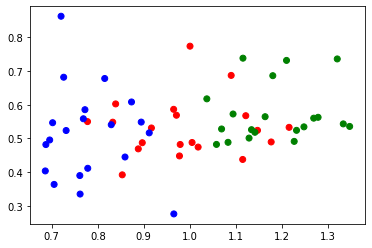

In [17]:
points_x = list(map(lambda x: x[0], points))
points_y = list(map(lambda x: x[1], points))
colors = ['r'] * cluster_size + ['g'] * cluster_size + ['b'] * cluster_size
plt.scatter(x=points_x, y=points_y, c=colors)

In [18]:
# Код алгоритма
def k_means(points, num_clusters):
    """
    @param points: список из пар координат точек
    @param num_clusters: число кластеров, на которое необходимо поделить

    @return: номера кластеров и их центры
    """
    num_points = len(points)
    # Выбираем начальные центры кластеров (просто первые num_clusters точек)
    centers = points[:num_clusters]
    # В качестве результата будет массив с номерами кластеров для каждой точки
    result = [-1] * num_points
    # Предыдущая копия массива result, чтобы сравнивать, поменялось что-то или нет
    prev_result = None
    
    # Выведем на экран стартовую ситуацию
    print("Входные данные")
    points_x = list(map(lambda x: x[0], points))
    points_y = list(map(lambda x: x[1], points))
    plt.scatter(x=points_x, y=points_y)
    plt.show()
    
    it_num = 1
    # Работаем до тех пор, пока кластеры не перестанут меняться
    while result != prev_result:
        prev_result = list(result)
        # Определяем каждую точку к кластеру
        ### ваш код здесь
        
        for i, (x1, y1) in enumerate(points):
            dist = []
            for (x2, y2) in centers:
                dist.append((x1 - x2) ** 2 + (y1 - y2) ** 2)
            result[i] = np.argmin(np.array(dist))
            
        # Меняем центры кластеров
        ### ваш код здесь
        centers = []
        for i in range(num_clusters):
            sumx = 0
            sumy = 0
            n = 0
            for j in range(len(points)):
                if result[j] == i:
                    sumx += points[j][0]
                    sumy += points[j][1]
                    n += 1
            centers.append((sumx / n, sumy / n))
            
            
            
            
        # Выведем то, что у нас получилось
        print("Итерация №{}".format(it_num))
        it_num += 1
        points_x = list(map(lambda x: x[0], points))
        points_y = list(map(lambda x: x[1], points))    
        plt.scatter(x=points_x, y=points_y, c=result)
        plt.show()
    return result, centers    

Выведем полученный результат

Входные данные


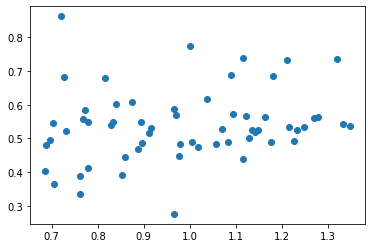

Итерация №1


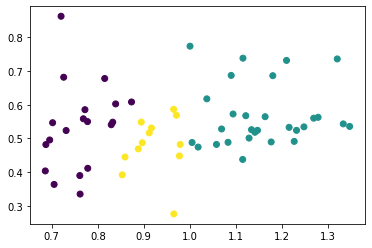

Итерация №2


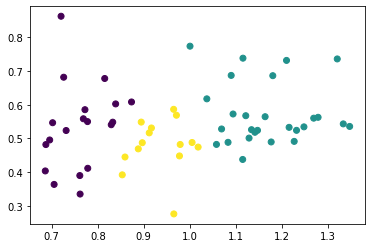

Итерация №3


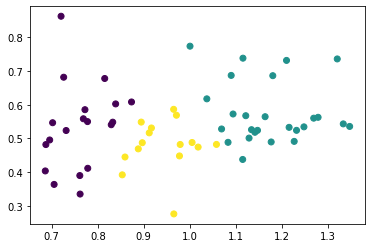

Итерация №4


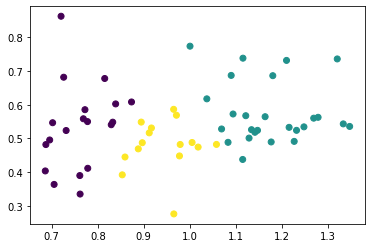

Истинные центры кластеров:
(1.0, 0.5)
(1.2, 0.6)
(0.8, 0.5)
Полученные центры кластеров. Порядок может поменяться, а значения могут немного отличаться:
(0.8, 0.5)
(1.2, 0.6)
(0.9, 0.5)


In [19]:
res, centers = k_means(points, 3)
print("Истинные центры кластеров:")
for i in range(num_clusters):
    print("({0:.1f}, {1:.1f})".format(means_x[i], means_y[i]))
print("Полученные центры кластеров. Порядок может поменяться, а значения могут немного отличаться:")
for i in range(num_clusters):
    print("({0:.1f}, {1:.1f})".format(centers[i][0], centers[i][1]))

### MSE

Напомним формулу для MSE между двумя массивами длины n. Необходимо проверить, насколько сильно они отличаются:
$$MSE(x, y) = \frac{1}{n}((x_1-y_1)^2+...+(x_n-y_n)^2)$$

In [39]:
def mse(x, y):
    """
    @param x, y: массивы одинаковой длины
    @return: число, результат их MSE
    """
    assert len(x) == len(y)
    ### ваш код здесь
    return sum([(x1 - x2) ** 2 for x1, x2 in zip(x, y)]) / len(x)

Проверим на простом примере. Должно получиться 5.0:

In [40]:
x = [1, 3, 2, 4, 5, 6]
y = [2, 4, 3, 5, 6, 1]
mse(x, y)

5.0

Теперь проверим на более сложном примере.  Далее в коде ничего изменять не надо, просто посмотрите, как отличаются ошибки алгоритма, который всегда выдаёт 0, а также более продвинутого алгоритма.

В качестве данных у нас картинки с рукописными цифрами из sklearn. Они небольшого размера, но, в принципе, все числа различимы. Это задача классификации с 10 классами (цифры от 0 до 9).

7


<Figure size 432x288 with 0 Axes>

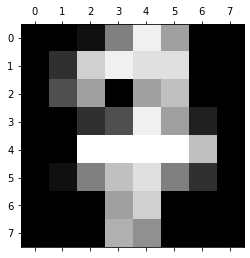

In [62]:
digits = load_digits()
plt.gray()
print(digits.target[17])
plt.matshow(digits.images[17])
plt.show()

Каждая черно-белая картинка это двухмерный массив 8x8, который мы будем использовать в качестве признаков. Первые 1500 цифр возьмём в качестве обучающей выборки, а оставшиеся в качестве тестовой.

In [63]:
X = digits.images.reshape(len(digits.images), -1)
y = digits.target

# Разбиваем на обучающую и тестовую выборки
X_train, y_train = X[:1500], y[:1500]
X_test, y_test = X[1500:], y[1500:]

# Создаём модель
clf = RandomForestClassifier()
# Обучаем модель
clf = clf.fit(X_train, y_train)

In [64]:
# Попробуем посмотреть, правильно ли обучилась модель
print("Истинные значения первых 10 элементов:")
print(y_test[:10])
y_pred = clf.predict(X_test[:10])
print("Предсказанные значения первых 10 элементов:")
print(y_pred)

Истинные значения первых 10 элементов:
[1 7 4 6 3 1 3 9 1 7]
Предсказанные значения первых 10 элементов:
[1 7 4 6 3 1 3 9 1 7]


Вполне неплохо. Выведем результат ошибки MSE на всей тестовой выборке

In [65]:
y_pred = clf.predict(X_test)
print("MSE={}".format(mse(y_test, y_pred)))

MSE=1.5420875420875422


А если вместо предсказаний будем всегда выдавать 0

In [66]:
y_pred = [0] * len(y_test)
print("MSE={}".format(mse(y_test, y_pred)))

MSE=28.754208754208754


Результат на лицо. 

In [87]:
def KNN(X_train, y_train, X_test, y_test, k):
    
    from collections import Counter
    
    def dist(x1, x2):
        mas = zip(x1, x2)
        return sum([(a - b) ** 2 for a, b in mas]) ** 0.5
    
    ans = []
    for center in X_test:
        friends = []
        for elem, znach in zip(X_train, y_train):
            friends.append((dist(elem, center), znach))
        friends.sort()
        vars = [elem[1] for elem in friends[:k]]
        ans.append(Counter(vars).most_common(1)[0][0])
    return ans

In [93]:
ans = KNN(X_train, y_train, X_test, y_test, 5)
print(*ans[:10])
print(*y_test[:10])

1 7 4 6 3 1 3 9 1 7
1 7 4 6 3 1 3 9 1 7


In [94]:
print("MSE={}".format(mse(y_test, ans)))

MSE=0.9932659932659933


In [97]:
params = []
for i in range(1, 20):
    params.append((i, mse(y_test, KNN(X_train, y_train, X_test, y_test, i))))

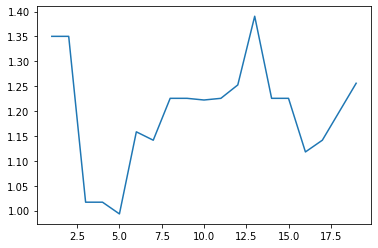

In [101]:
x, y = zip(*params)
plt.plot(x, y)